## HDCS Fall 22 internship project #2: Stage B Graded Quiz
ML Regression - Predicting Energy Efficiency of Buildings
### Import the required libraries


In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [64]:
df = pd.read_csv("/content/energydata_complete.csv", encoding = "latin-1")

In [65]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


### Data Assessement

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [67]:
df.duplicated().sum()

0

In [68]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


### Features extraction

In [73]:
# Extract features from date
df.date = pd.to_datetime(df.date, format='%Y-%m-%d', errors='ignore')

In [74]:
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [75]:
df.drop('date', inplace=True, axis=1)

### Correlation 

In [76]:
df.corr()["Appliances"].sort_values(ascending=False)

Appliances     1.000000
lights         0.197278
T2             0.120073
T6             0.117638
T_out          0.099155
Windspeed      0.087122
RH_1           0.086031
T3             0.085060
T1             0.055447
T4             0.040281
T8             0.039572
RH_3           0.036292
T7             0.025801
T5             0.019760
RH_4           0.016965
Tdewpoint      0.015353
T9             0.010010
RH_5           0.006955
day            0.002366
Visibility     0.000230
rv1           -0.011145
rv2           -0.011145
month         -0.011606
Press_mm_hg   -0.034885
RH_9          -0.051462
RH_7          -0.055642
RH_2          -0.060465
RH_6          -0.083178
RH_8          -0.094039
RH_out        -0.152282
Name: Appliances, dtype: float64

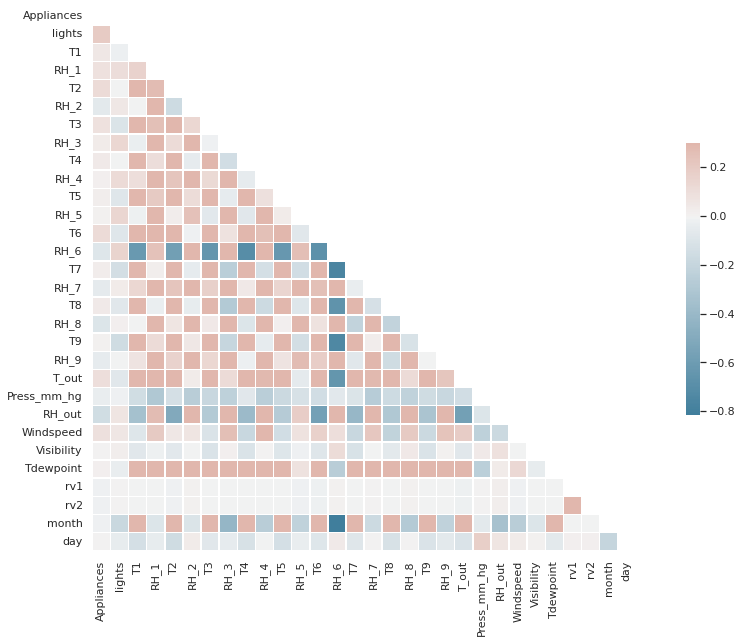

In [81]:
from string import ascii_letters

sns.set_theme(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Linear Regression Model with Stats Models

In [84]:
from statsmodels.compat import lzip
import statsmodels.api as sm
from statsmodels.formula.api import ols

# fitting the model
Lr_model = ols("Appliances ~ lights + T1 + RH_1 + T2 + RH_2 + T3 + RH_3 + T4 + RH_4 + T5 + RH_5 + T6 + T7 + RH_7 + T8 + RH_8 + T9 + RH_9 + T_out + Press_mm_hg + RH_out + Windspeed + Visibility + Tdewpoint + rv1 + rv2 + month + day", data=df).fit()

# model summary
Lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Appliances   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     146.3
Date:                Sun, 04 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:29:15   Log-Likelihood:            -1.1757e+05
No. Observations:               19735   AIC:                         2.352e+05
Df Residuals:                   19707   BIC:                         2.354e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      37.1473     95.262      0.390      0.697    -149.574     223.868
lights          1.9742      0.095     20.691      0.000       1.787       2.161
T1             -1.8601      1.850     -1.005      0.315      -5.487       1.767
RH_1           15.1527      0.669     22.640      0.000      13.841      16.465
T2            -17.8072      1.635    -10.892      0.000     -21.012     -14.603
RH_2          -13.3286      0.767    -17.383      0.000     -14.831     -11.826
T3             26.6517      1.087     24.519      0.000      24.521      28.782
RH_3            4.2336      0.687      6.164      0.000       2.887       5.580
T4             -3.4033      1.023     -3.326      0.001      -5.409      -1.398
RH_4           -0.7817      0.643     -1.215      0.224      -2.042       0.479
T5              0.5109      1.176      0.434      0.664      -1.794       2.816
RH_5            0.1201      0.087      1.383      0.167      -0.050       0.290
T6              6.4583      0.606     10.664      0.000       5.271       7.645
T7              0.5916      1.333      0.444      0.657      -2.021       3.204
RH_7           -1.5396      0.430     -3.584      0.000      -2.382      -0.698
T8              8.2844      0.968      8.561      0.000       6.388      10.181
RH_8           -4.4564      0.375    -11.872      0.000      -5.192      -3.721
T9            -11.6032      1.860     -6.237      0.000     -15.250      -7.957
RH_9           -1.2401      0.424     -2.925      0.003      -2.071      -0.409
T_out          -7.3455      1.469     -4.999      0.000     -10.225      -4.466
Press_mm_hg     0.1246      0.108      1.152      0.249      -0.087       0.337
RH_out         -0.3867      0.294     -1.317      0.188      -0.962       0.189
Windspeed       1.3493      0.348      3.872      0.000       0.666       2.032
Visibility      0.1396      0.058      2.419      0.016       0.026       0.253
Tdewpoint       3.7312      1.438      2.595      0.009       0.913       6.550
rv1            -0.0212      0.023     -0.921      0.357      -0.066       0.024
rv2            -0.0212      0.023     -0.921      0.357      -0.066       0.024
month         -13.7537      1.763     -7.802      0.000     -17.209     -10.298
day            -0.1297      0.096     -1.347      0.178      -0.318       0.059
==============================================================================
Omnibus:                    13976.717   Durbin-Watson:                   0.626
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           211900.869
Skew:                           3.325   Prob(JB):                         0.00
Kurtosis:                      17.611   Cond. No.                     1.00e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covar

### Linear Regression with Sickit-learn

In [86]:
# Train-Test Split
from sklearn.model_selection import train_test_split  

X = df.drop(["Appliances", "RH_6"], axis=1)
y = df["Appliances"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
# LR Model
from sklearn.linear_model import LinearRegression 

Lr_model2 = LinearRegression()  
Lr_model2.fit(X_train, y_train) 

print("Regession Score (R2) is: " + str(Lr_model2.score(X_test, y_test)))

Regession Score is: 0.16992915457756064


### Model Evaluation

In [90]:

# Predictions
y_pred = Lr_model2.predict(X_test)

Eval = pd.DataFrame({'Actual': list(y_test), 'Predicted': list(y_pred)})
Eval

,Actual,Predicted
0,40,41.808702
1,90,253.686036
2,50,50.670867
3,50,118.043667
4,70,29.463506
...,...,...
3942,80,123.718561
3943,100,119.205028
3944,60,110.136135
3945,70,61.012818


In [91]:
# Evaluation metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)

#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)


MAE: 52.56801443700702
MSE: 8306.594564667785
RMSE: 91.14052098088854


### Errors visualization

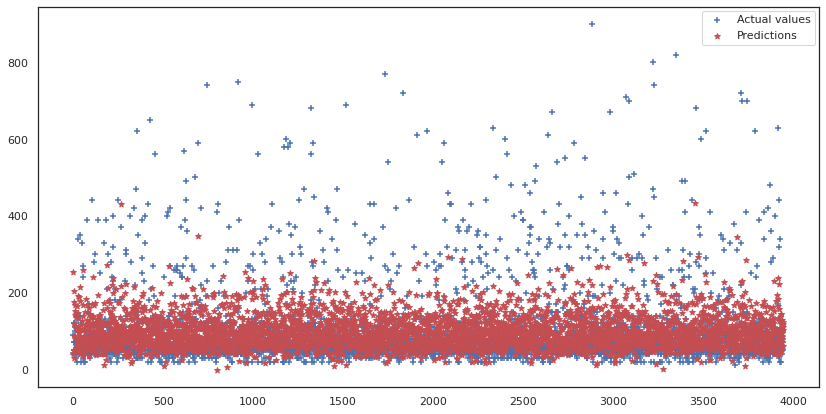

In [109]:
fig, ax = plt.subplots(figsize = (14,7))

x = np.arange(0, len(Eval), 1)
ax.scatter(x, Eval['Actual'], c='b', label='Actual values', marker='+')
ax.scatter(x, Eval["Predicted"], c='r', label='Predictions', marker='*')
ax.legend(loc=(0.85, 0.9))